In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#Read data into pandas dataframe. Excluded last line in database as it did not contain data
df_all = pd.read_csv('fatal_encounters.csv', skipfooter = 1, engine = 'python')

#Drop columns not used for analysis
columns_to_drop = ['Unique ID', 
    'Subject\'s race', 
    'Imputation probability', 
    'URL of image of deceased', 
    'Location of injury (address)',
    'Location of death (city)',
    'Location of death (zip code)',
    'Location of death (county)', 
    'Full Address', 
    'Latitude',
    'Longitude',
    'Agency responsible for death',
    'A brief description of the circumstances surrounding the death', 'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS', 
    'Link to news article or photo of official document', 
    'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS', 
    'Video', 
    'Date&Description', 
    'Unique ID formula', 
    'Unique identifier (redundant)']

df = df_all.drop(columns_to_drop, axis = 1)

#Rename columns for easier analysis
column_new_names = {'Subject\'s name': 'name', 
    'Subject\'s age': 'age', 
    'Subject\'s gender': 'gender',
    'Subject\'s race with imputations': 'race',
    'Date of injury resulting in death (month/day/year)': 'date_of_death',
    'Location of death (state)': 'state',
    'Cause of death': 'cause_of_death', 
    'Date (Year)': 'year'}

df.rename(columns = column_new_names, inplace = True)

#Drop data for 2020 
df = df[df.year != 2020]

#Change Date of Death from an object into a datetime
df.date_of_death = pd.to_datetime(df.date_of_death)

#Fix spelling of race data
df.race = df.race.replace('European American/White', 'European-American/White')

In [2]:
#Number of police killings per state
state_killings = df.groupby(df.state).name.count().sort_values(ascending=False)
print(state_killings)

state
CA    4431
TX    2410
FL    1622
GA    1020
IL    1012
OH     903
PA     894
MO     834
MI     822
AZ     793
OK     636
NY     619
AL     598
WA     590
CO     585
TN     581
LA     571
VA     566
NC     559
SC     517
NJ     504
IN     502
MD     484
WI     403
MS     394
KS     384
KY     367
NM     366
NV     348
AR     336
MN     305
OR     305
IA     252
UT     219
NE     193
MA     185
WV     170
CT     131
ID     130
AK     110
HI      99
ME      92
MT      88
DC      80
DE      55
SD      52
WY      52
NH      50
VT      36
ND      32
RI      26
Name: name, dtype: int64


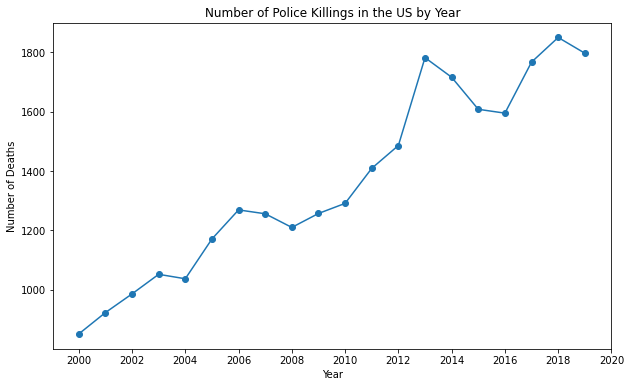

In [3]:
#Number of police killings per year
killings_per_year = df.groupby(df.year).name.count()

#Plot number of police killings per year
year_x = df.year.unique()
year_y = killings_per_year

plt.figure(figsize = (10, 6))

ax1 = plt.subplot()
plt.plot(year_x, year_y, marker = 'o')
ax1.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
plt.title('Number of Police Killings in the US by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

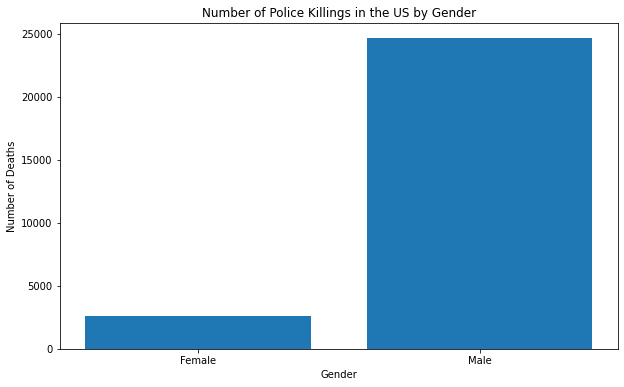

In [4]:
#Number of police killings per gender
killings_per_gender = df.groupby(df.gender).name.count()

#Plot police killings per gender (Only Male and Female)
gender_x = [0, 1]
gender_y = killings_per_gender[:2]

plt.figure(figsize = (10, 6))

ax2 = plt.subplot()
plt.bar(gender_x, gender_y)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Female', 'Male'])
plt.title('Number of Police Killings in the US by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.show()

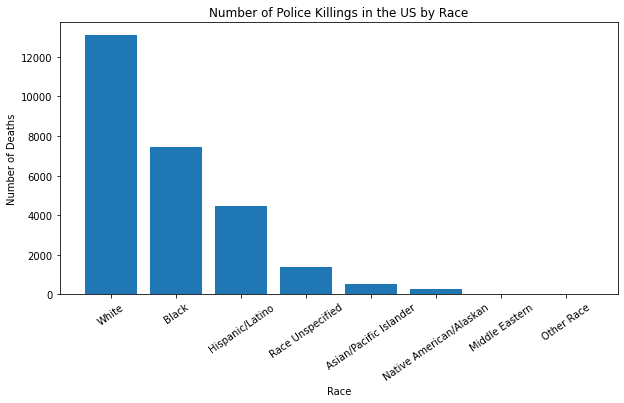

In [5]:
#Number of police killings per race
killings_per_race = df.groupby(df.race).name.count().sort_values(ascending = False)

#Plot number of police killings per race
race_x = range(len(killings_per_race))
race_y = killings_per_race

plt.figure(figsize=(10, 6))
plt.gcf().subplots_adjust(bottom=0.25)

ax3 = plt.subplot()
plt.bar(race_x, race_y)
ax3.set_xticks(range(len(killings_per_race)))
ax3.set_xticklabels(['White', 'Black', 'Hispanic/Latino', 'Race Unspecified', 'Asian/Pacific Islander', 'Native American/Alaskan', 'Middle Eastern', 'Other Race'], rotation=35)
plt.title('Number of Police Killings in the US by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.show()

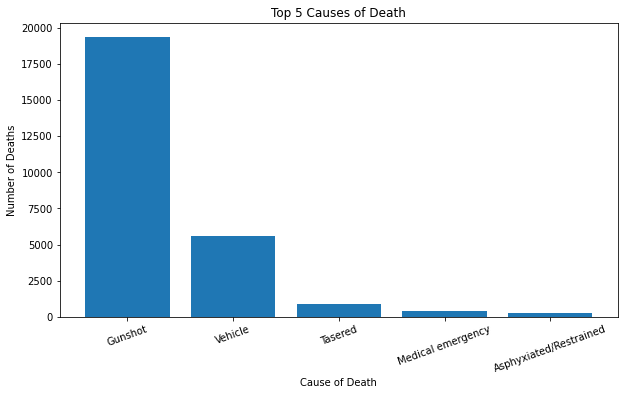

In [6]:
#Causes of death
death_causes = df.groupby(df.cause_of_death).name.count().sort_values(ascending = False)

#Plot top 5 causes of death
death_x = [0, 1, 2, 3, 4]
death_y = death_causes[:5]

plt.figure(figsize = (10, 6))
plt.gcf().subplots_adjust(bottom=0.20)

ax4 = plt.subplot()
plt.bar(death_x, death_y)
ax4.set_xticks([0, 1, 2, 3, 4])
ax4.set_xticklabels(['Gunshot', 'Vehicle', 'Tasered', 'Medical emergency', 'Asphyxiated/Restrained'], rotation=20)
plt.title('Top 5 Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.show()